# 07140147 José Luis Hernández
## Tarea 04 -  Satatistical Learning

# librerias

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xlsxwriter

### Funciones Secundarias

In [2]:
##  imputacion media y mediana

## calculo media y rellenado de valores nulos
def ImpMeanV(df,col1):
    mv = np.round(df[col1].mean(),0)
    return(df[col1].fillna(mv))

## calculo mediana y rellenado de valores nulos
def ImpMedianV(df,col1):
    mv = np.round(df[col1].median(),0)
    return(df[col1].fillna(mv))

In [3]:
##  graficado de densisdad
def plt_dns_df(df,col1):
    df_mean = ImpMeanV(df, col1)
    df_median = ImpMedianV(df, col1)
    fig = plt.figure()
    fig.add_subplot(111)
    df[col1].plot.density(color = 'red')
    df_mean.plot.density(color = 'blue')
    df_median.plot.density(color = 'green')

In [4]:
## correlacion y fill de valores nulos
def FillNaN_Corr_DF(df, col1, col2):
    mean_val = np.round(df[col1].mean(), 0)
    print(f'La media es: {mean_val}')
    median_val = np.round(df[col1].median(), 0)
    print(f'La mediana es: {median_val}')
    df_LF_meanImp = df[col1].fillna(mean_val)
    df_LF_meadianImp = df[col1].fillna(median_val)
    corr1 = np.corrcoef(df_LF_meanImp, df[col2])[0,1]
    corr2 = np.corrcoef(df_LF_meadianImp, df[col2])[0,1]
    print(corr1)
    print(corr2)
    if corr1 >= corr2:
        df[col1] = df[col1].fillna(mean_val)
    else:
        df[col1] = df[col1].fillna(median_val)
    print('Validacion Valores Nulos:')
    print(df[col1].isnull().sum())

In [5]:
## funcion para detecetar variables continuas
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [6]:
## funcion para graficar la variable con su densidad
def plot_density_variable(df, col1):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[col1].hist(bins=30)
    plt.title(col1)
    
    plt.subplot(122)
    stats.probplot(df[col1], dist="norm", plot=plt)
    plt.show()

In [7]:
## seleccion de nuevo df 
def new_df_trans(df, col1, col2):
    df = df.loc[:, [col1, col2]]
    return(df)

In [8]:
## transformacion metodo YeoJhonson
def trans_YeoJohnson(df, col1, col2):
    df[col1+"_YJ"], lambdaX = stats.yeojohnson(df[col2])
    print("correlacion: ", np.corrcoef(df[col1+"_YJ"], df[col2])[0, 1])
    plot_density_variable(df, col1+"_YJ")
    return(df)

In [9]:
#Outliers
def inspect_outliers(df, col1):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[col1], bins=30)
    plt.title("Densisd-Histograma: " + col1)
    
    plt.subplot(132)
    stats.probplot(df[col1], dist="norm", plot=plt)
    plt.title("QQ-Plot: " + col1)
    
    plt.subplot(133)
    sns.boxplot(y=df[col1])
    plt.title("Boxplot: " + col1)
    
    plt.show()

In [10]:
##Función para detectar outliers
def detect_outliers(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor)
    
    return LI, LS

In [11]:
## tratamiento de outliers
def outlier_treatment(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor)
    
    df[col1] = np.where(df[col1] > LS, LS,
                                          np.where(df[col1] < LI, LI, df[col1]))
    return(df)

In [12]:
## FeatureScaling
def FeatureScaling(df):
    scaler = StandardScaler()
    scaler.fit(df) #calcular parámetros de configuración para cada columna.
    StandardScaler()
    df_scaler = pd.DataFrame(scaler.transform(df), columns=df.columns)    
    return(df_scaler)

#  Funcion Final - Principal

In [13]:
def funcion_final (df, col1, col2, factor):
    ImpMeanV(dataset, col1)
    ImpMedianV(dataset, col1)
    plt_dns_df(dataset, col1)
    FillNaN_Corr_DF(dataset, col1, col2)
    numeric_cont_vars = getContinuesCols(dataset)
    plot_density_variable(dataset, col1)
    
    for col in numeric_cont_vars:
            plot_density_variable(df, col)
            
    new_df = new_df_trans(df, col1, col2)
    plot_density_variable(new_df, col1)
    new_df = trans_YeoJohnson(new_df,col1,col2)   
    
    for col in numeric_cont_vars:
        inspect_outliers(df, col)
    
    detect_outliers(df, col1, factor)
    
    for col in numeric_cont_vars:
        outlier_treatment(df, col, factor)
    
    dataset_temp = df.loc[:, numeric_cont_vars]
    dataset_temp.describe()
    
    final = FeatureScaling(dataset_temp)
    return final

# Ejecucion Funcion Final

In [14]:
dataset = pd.read_csv("train_HP.csv")

La media es: 9691.0
La mediana es: 9478.0
0.43221083420744133
0.43221083420744133
Validacion Valores Nulos:
0


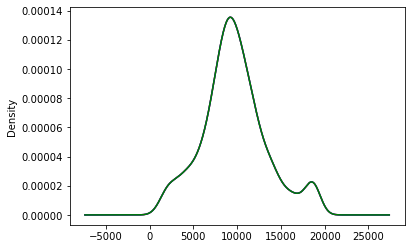

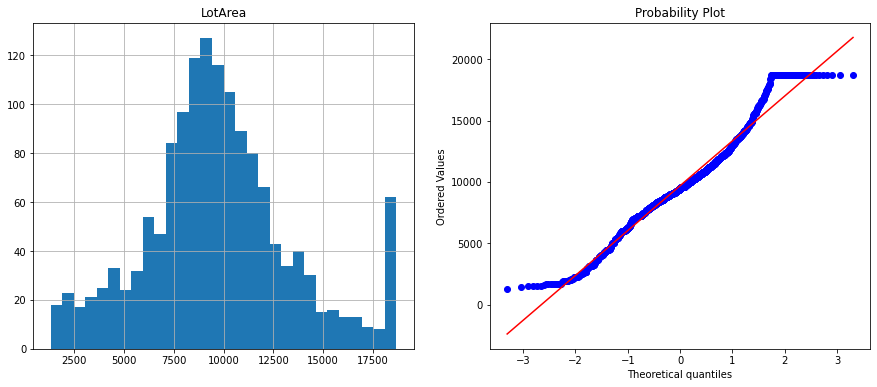

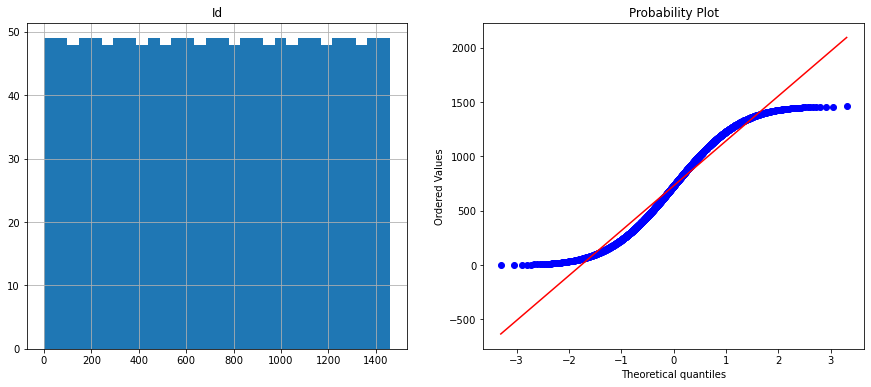

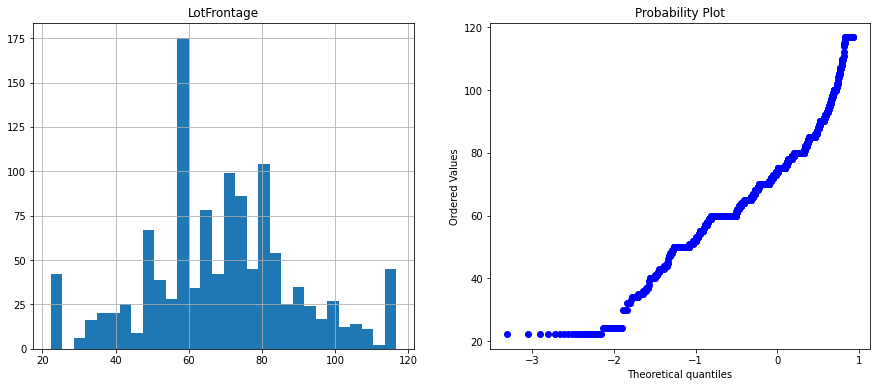

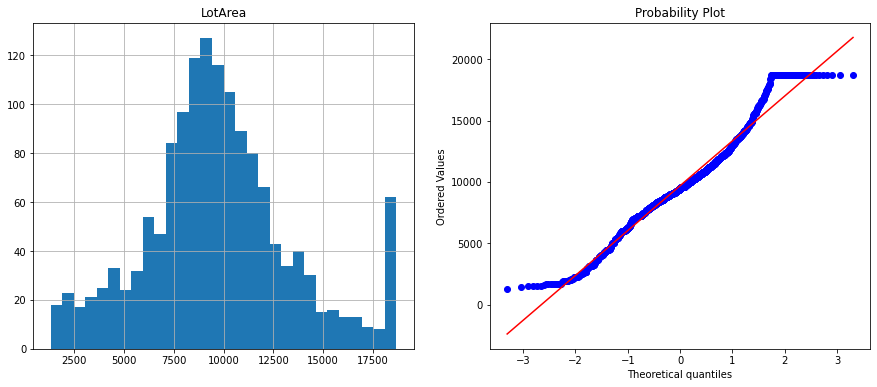

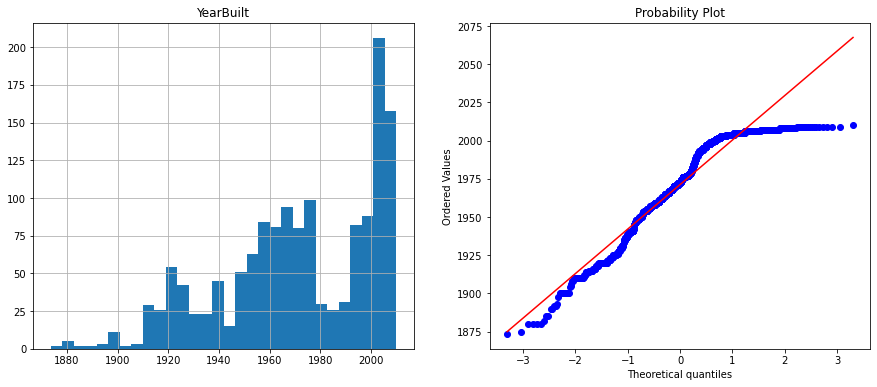

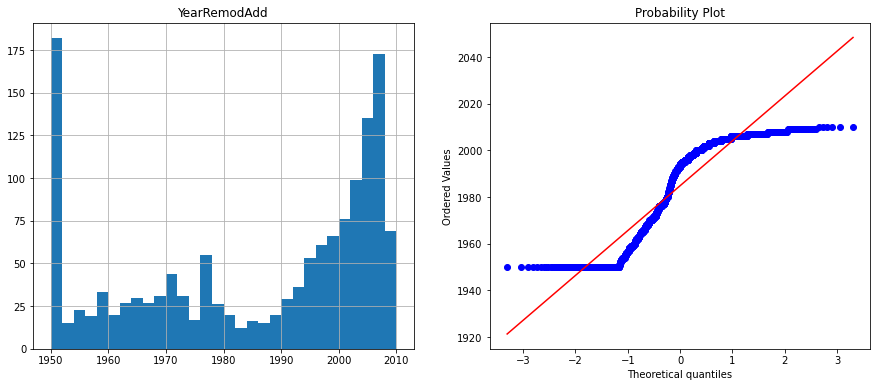

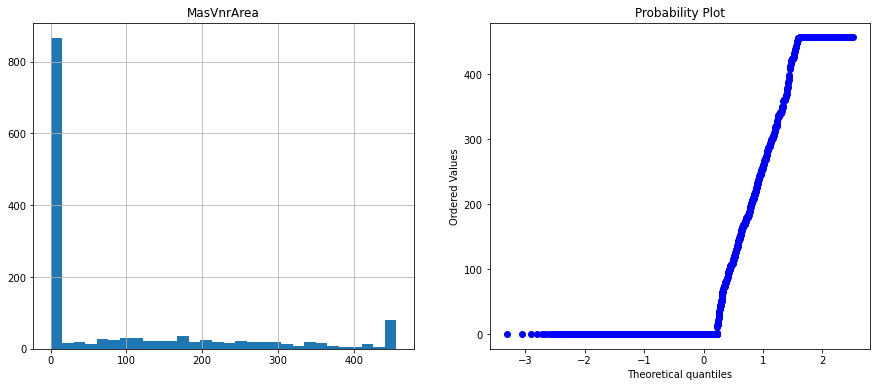

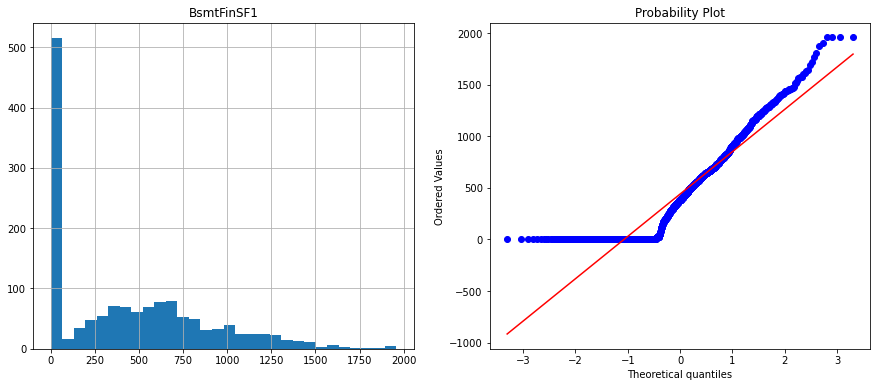

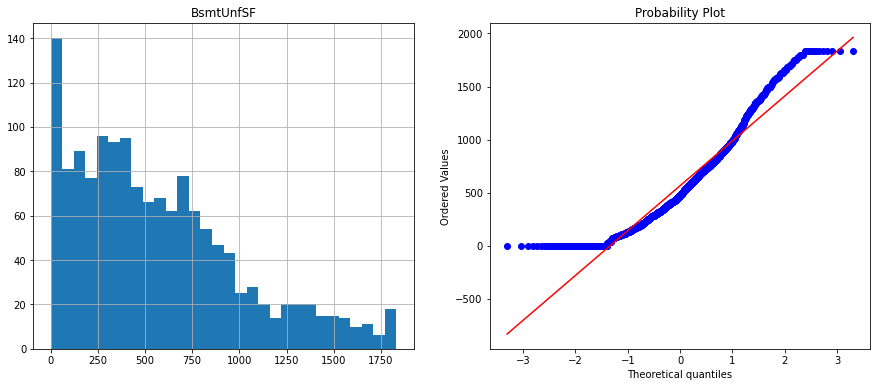

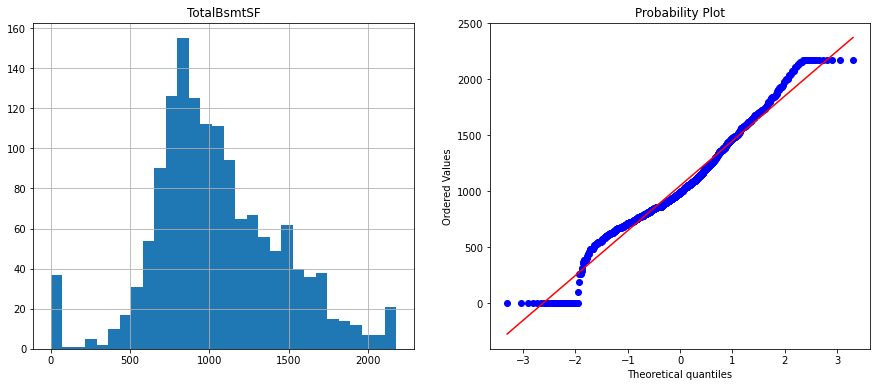

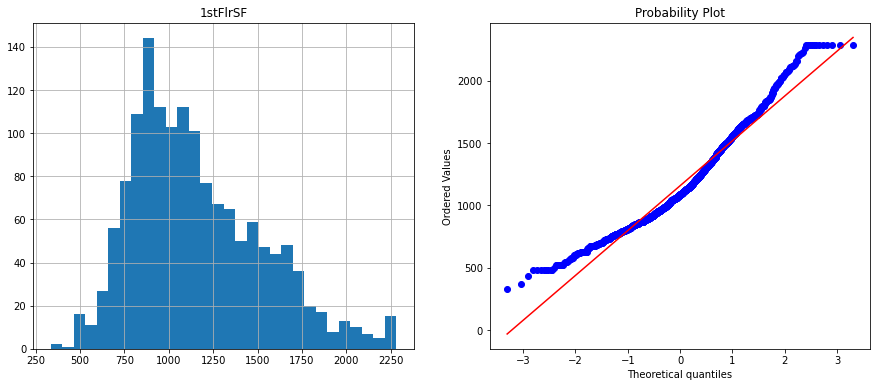

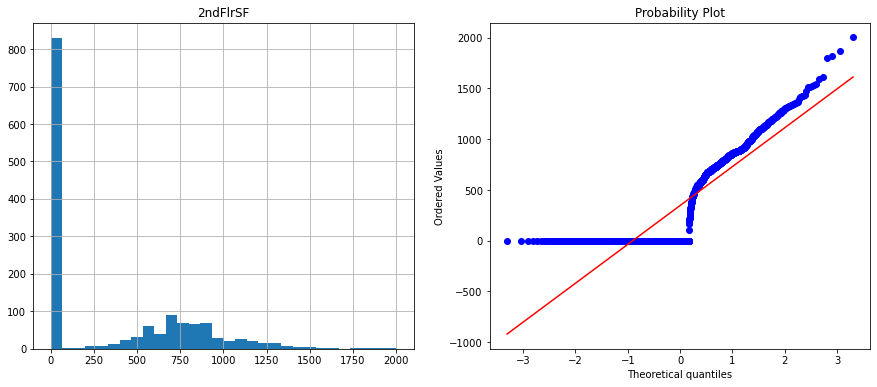

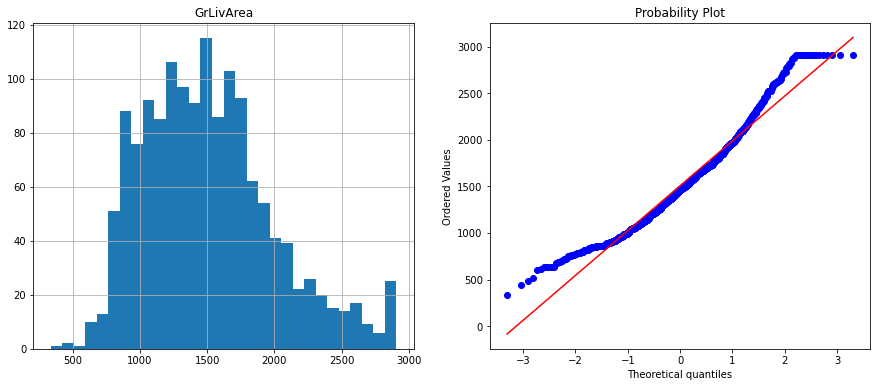

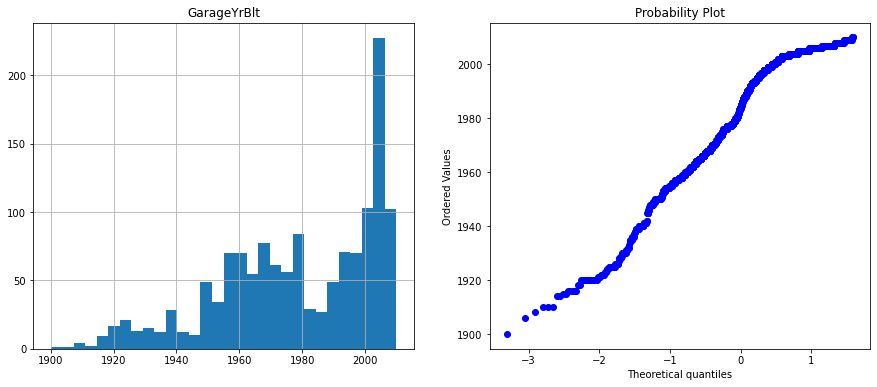

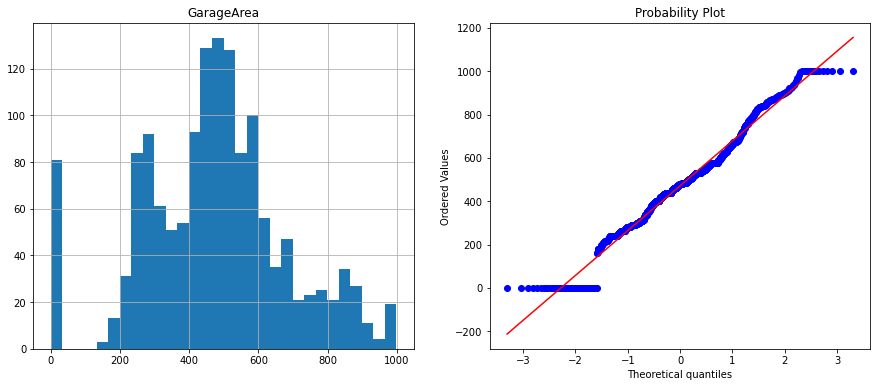

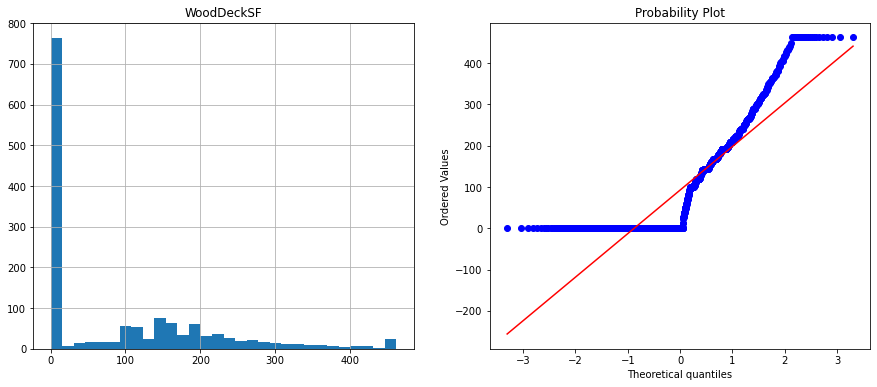

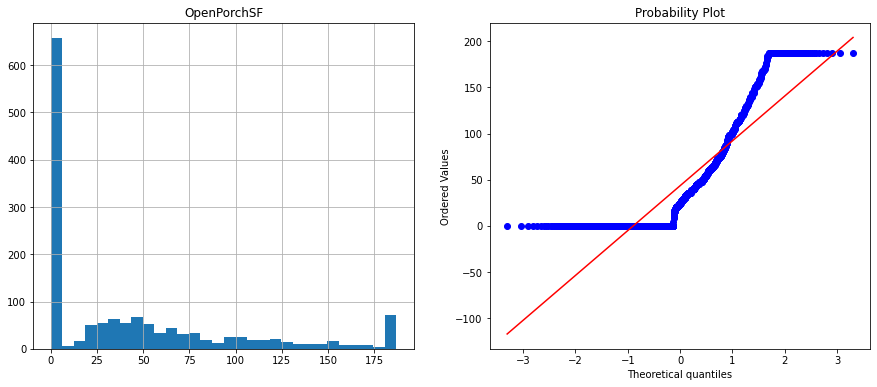

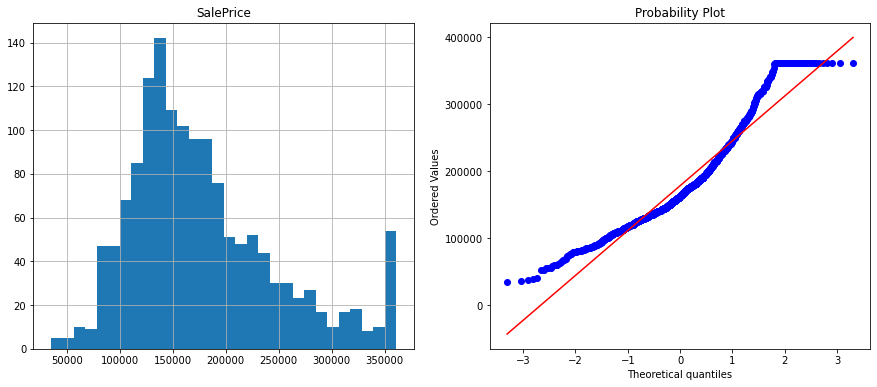

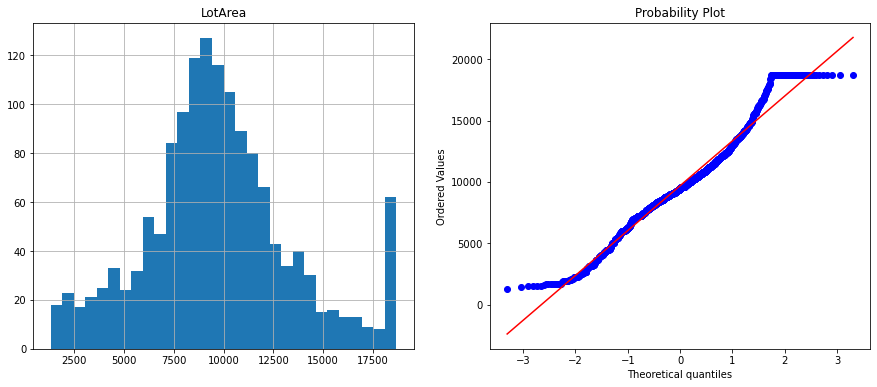

correlacion:  0.9741002907752766


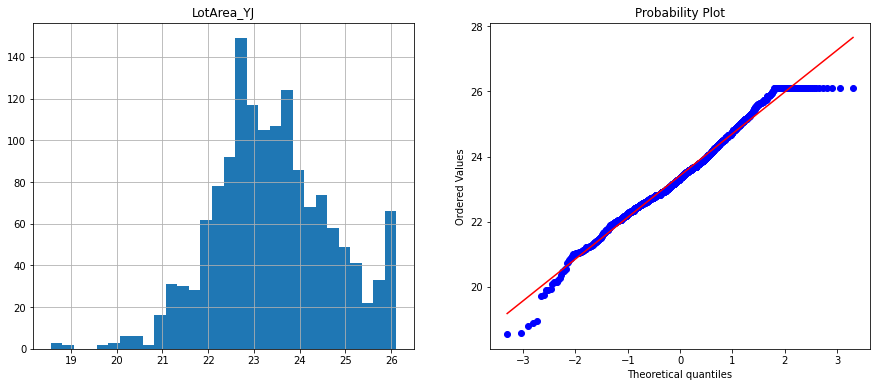

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


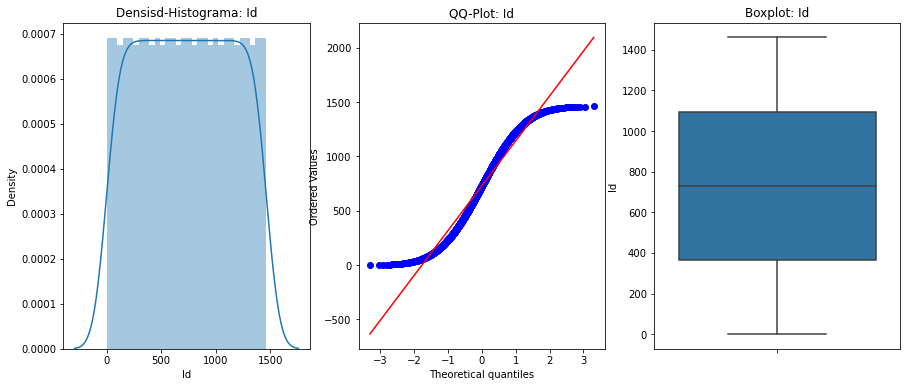

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


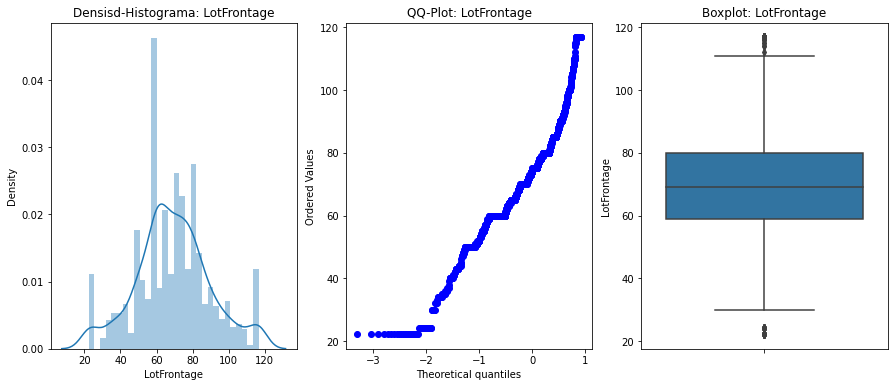

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


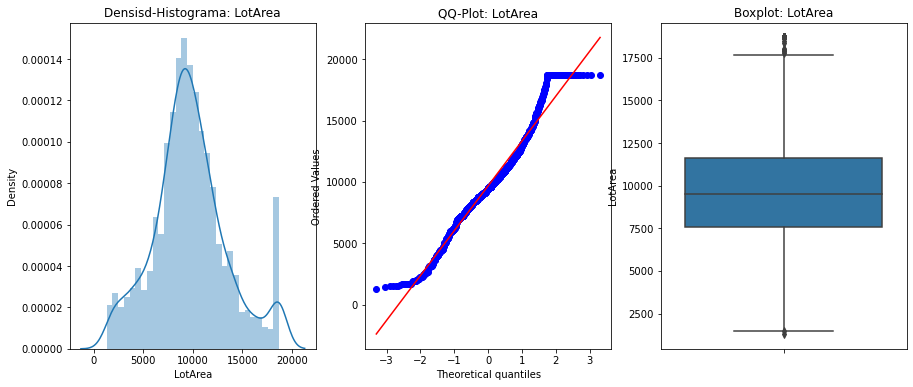

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


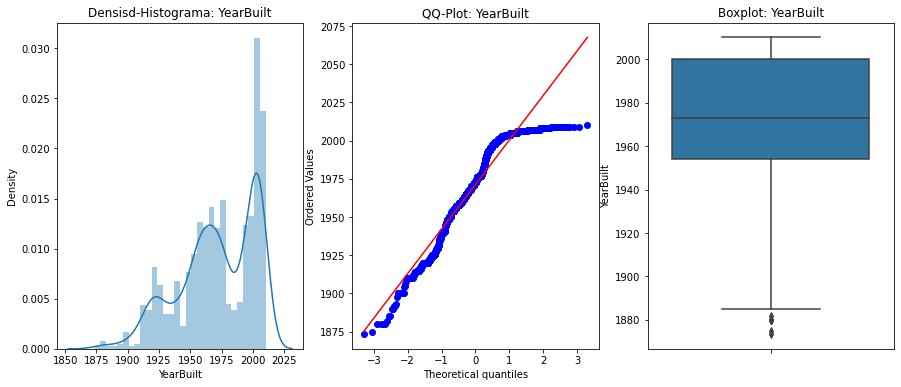

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


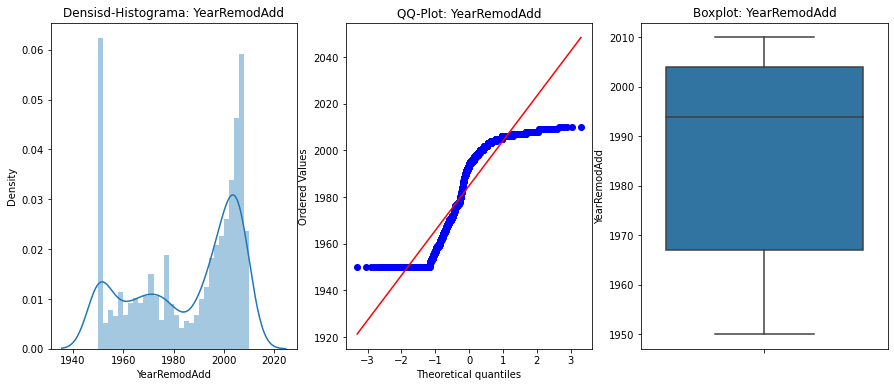

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


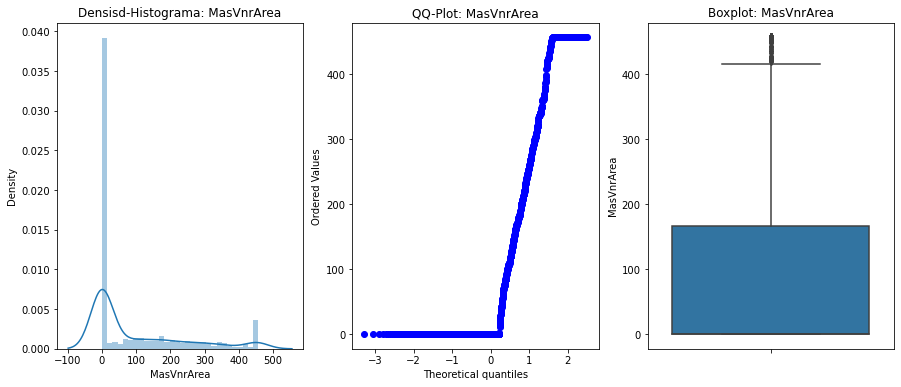

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


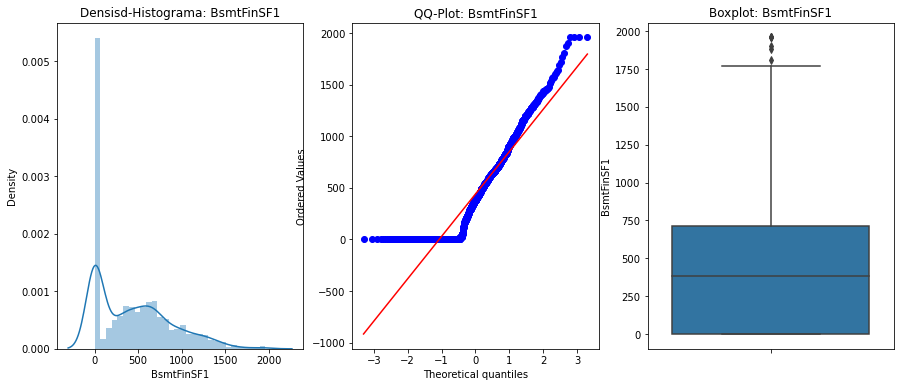

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


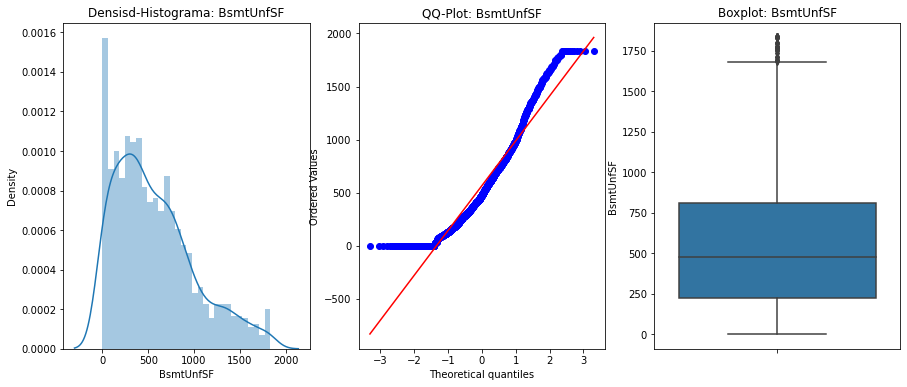

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


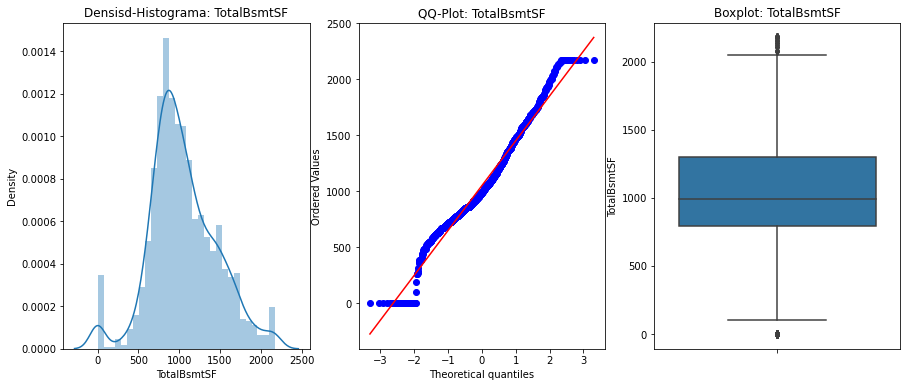

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


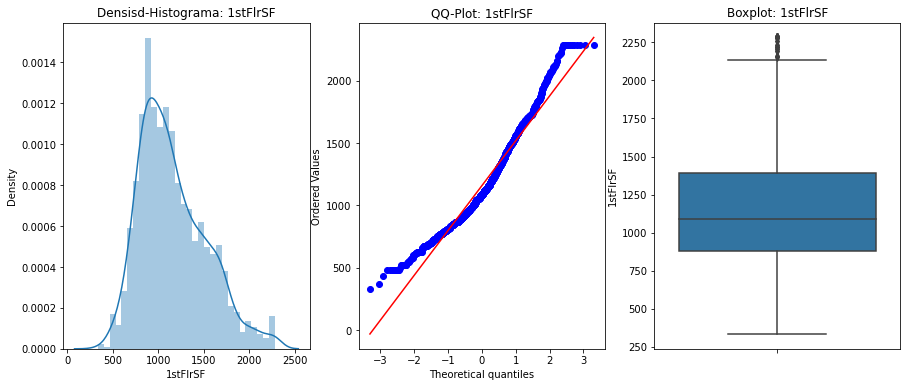

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


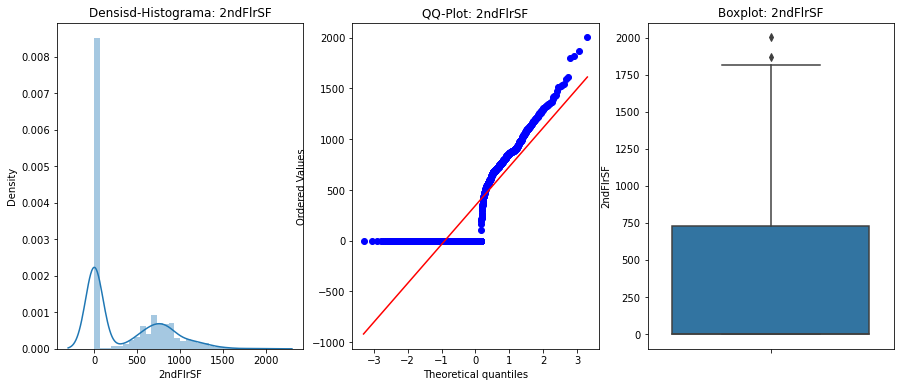

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


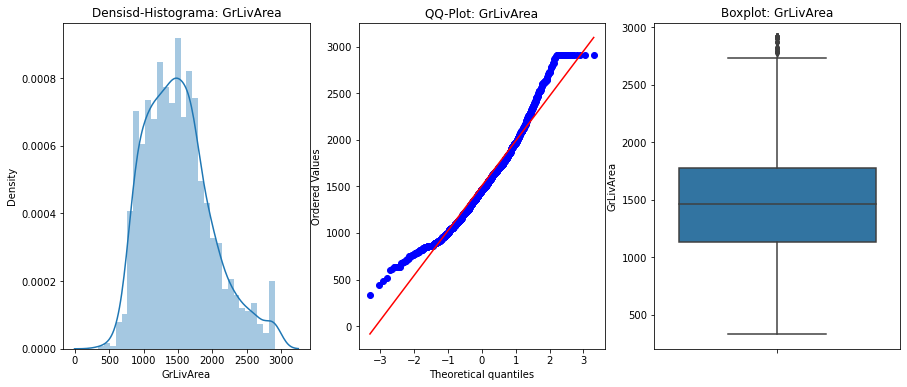

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


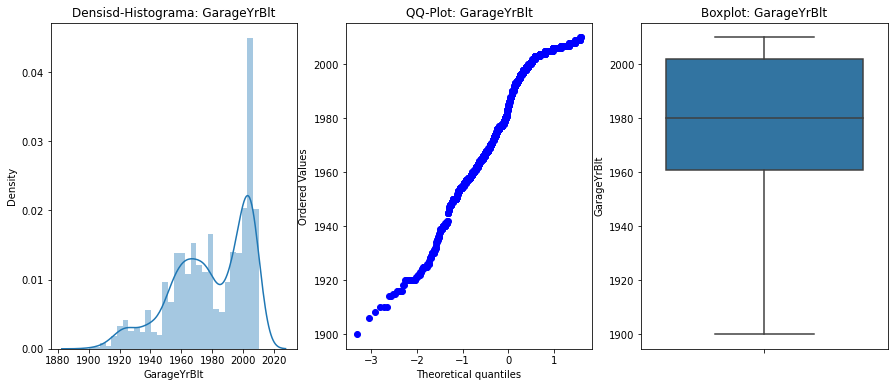

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


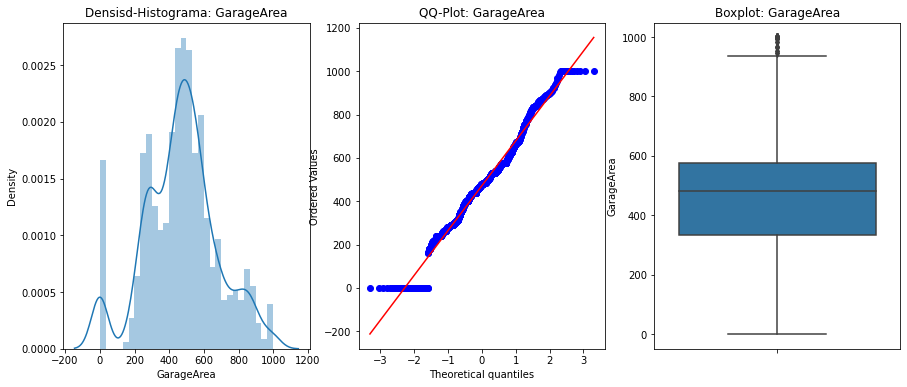

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


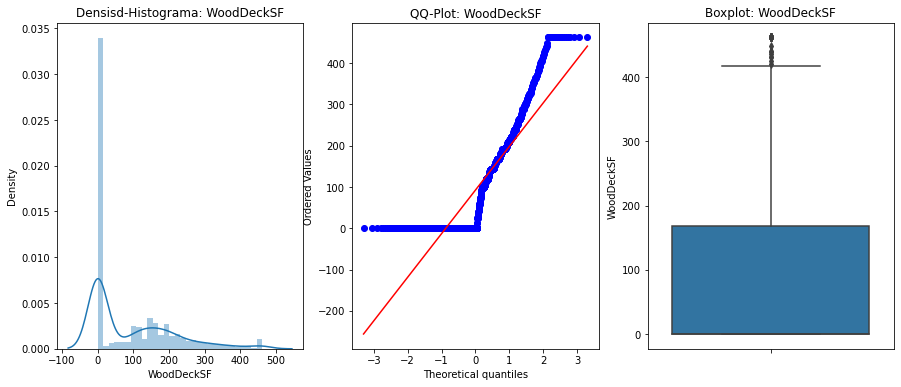

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


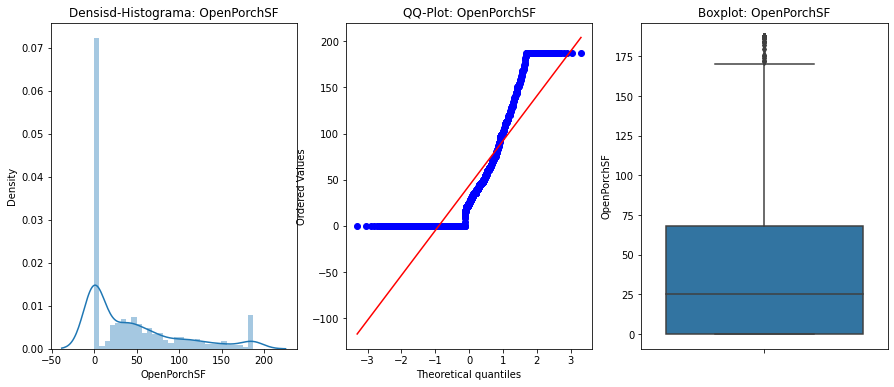

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


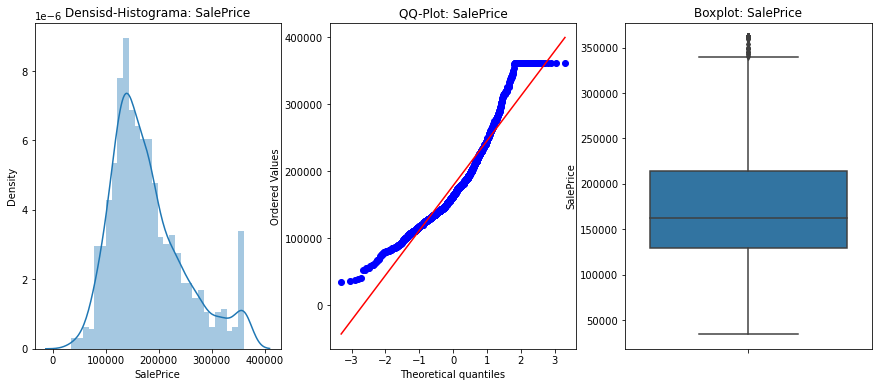

In [16]:
dataset_final = funcion_final(dataset, 'LotArea', 'SalePrice', 1.75)

In [17]:
dataset_final

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,-1.730865,-0.204101,-0.335801,1.051076,0.878668,0.734393,0.609658,-0.951649,-0.481236,-0.825400,1.162395,0.416124,0.992426,0.366743,-0.778691,0.321660,0.438857
1,-1.728492,0.530541,-0.024548,0.156717,-0.429577,-0.657407,1.234614,-0.644894,0.521600,0.282979,-0.795368,-0.500246,-0.101543,-0.054680,1.727934,-0.795663,0.048698
2,-1.726120,-0.057173,0.422033,0.984828,0.830215,0.492959,0.104179,-0.301512,-0.323153,-0.650680,1.189904,0.571580,0.911391,0.654077,-0.778691,-0.026359,0.655612
3,-1.723747,-0.448982,-0.038080,-1.863873,-0.720298,-0.657407,-0.516181,-0.058856,-0.728240,-0.538750,0.937733,0.430443,0.789839,0.816900,-0.778691,-0.154576,-0.550990
4,-1.721374,0.726446,1.236704,0.951703,0.733308,1.827951,0.492479,-0.173317,0.232605,-0.036431,1.618595,1.414313,0.870874,1.745947,0.836316,0.742946,1.038546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.351030,-0.480060,0.918579,0.733308,-0.657407,-1.012470,0.886589,-0.241642,-0.560590,0.795601,0.287260,0.830356,-0.054680,-0.778691,-0.062992,-0.045229
1456,1.723747,0.775422,0.943044,0.222966,0.151865,0.187615,0.802659,0.053316,1.213211,2.497006,-0.795368,1.158629,-0.020508,0.136876,2.156920,-0.795663,0.460533
1457,1.726120,-0.155125,-0.175573,-1.002638,1.024029,-0.657407,-0.380621,0.712609,0.249896,0.080959,1.845549,1.704769,-1.519651,-1.050771,-0.778691,0.303343,1.276977
1458,1.728492,-0.057173,0.007119,-0.704518,0.539493,-0.657407,-0.899886,-1.295031,0.067113,-0.219341,-0.795368,-0.876612,-1.154995,-1.108238,2.299915,-0.795663,-0.520283


In [43]:
dataset_final.to_excel('dataset_final_con_tratamiento.xlsx', index = False)